### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [2]:
ventas_totales_tienda = {
    'tienda':0.0,
    'tienda2':0.0,
    'tienda3':0.0,
    'tienda4':0.0
}

In [3]:
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ['tienda', 'tienda2', 'tienda3', 'tienda4']

In [4]:
for nombre, tienda in zip(nombres_tiendas, tiendas):
    ventas_totales_tienda[nombre] = tienda['Precio'].sum()

print(ventas_totales_tienda)
    

{'tienda': np.float64(1150880400.0), 'tienda2': np.float64(1116343500.0), 'tienda3': np.float64(1098019600.0), 'tienda4': np.float64(1038375700.0)}


# 2. Ventas por categoría

In [5]:
mejor_categoria_producto = {
    'tienda': [],
    'tienda2': [],
    'tienda3': [],
    'tienda4': []
}

In [6]:
for nombre, tienda in zip(nombres_tiendas, tiendas):
    categoria_producto = tienda['Categoría del Producto'].value_counts().head(3)
    mejor_categoria_producto[nombre] = categoria_producto.to_dict()
    
print(mejor_categoria_producto)

{'tienda': {'Muebles': 465, 'Electrónicos': 448, 'Juguetes': 324}, 'tienda2': {'Muebles': 442, 'Electrónicos': 422, 'Juguetes': 313}, 'tienda3': {'Muebles': 499, 'Electrónicos': 451, 'Juguetes': 315}, 'tienda4': {'Muebles': 480, 'Electrónicos': 451, 'Juguetes': 338}}


# 3. Calificación promedio de la tienda


In [7]:
calificacion_promedio_tienda = {
    'tienda': 0.0,
    'tienda2': 0.0,
    'tienda3': 0.0,
    'tienda4': 0.0
}

In [8]:
for nombre, tiend in zip(nombres_tiendas, tiendas):
    calificacion_promedio_tienda[nombre] = tiend['Calificación'].mean().round(2)
print(calificacion_promedio_tienda)

{'tienda': np.float64(3.98), 'tienda2': np.float64(4.04), 'tienda3': np.float64(4.05), 'tienda4': np.float64(4.0)}


# 4. Productos más y menos vendidos

In [9]:
ventas_productos_tienda = {
    'tienda': { 'mas_vendidos': {}, 'menos_vendidos': {} },
    'tienda2': { 'mas_vendidos': {}, 'menos_vendidos': {} },
    'tienda3': { 'mas_vendidos': {}, 'menos_vendidos': {} },
    'tienda4': { 'mas_vendidos': {}, 'menos_vendidos': {} }
}

In [10]:
for nombre, tiend in zip(nombres_tiendas, tiendas):
    
    productos_vendidos = tiend['Producto'].value_counts()
    mas_vendidos = productos_vendidos.head(3).to_dict()
    menos_vendidos = productos_vendidos.tail(3).to_dict()
    ventas_productos_tienda[nombre]['mas_vendidos'] = mas_vendidos
    ventas_productos_tienda[nombre]['menos_vendidos'] = menos_vendidos
 
print(ventas_productos_tienda)

{'tienda': {'mas_vendidos': {'Microondas': 60, 'TV LED UHD 4K': 60, 'Armario': 60}, 'menos_vendidos': {'Olla de presión': 35, 'Auriculares con micrófono': 33, 'Celular ABXY': 33}}, 'tienda2': {'mas_vendidos': {'Iniciando en programación': 65, 'Microondas': 62, 'Batería': 61}, 'menos_vendidos': {'Mesa de comedor': 34, 'Impresora': 34, 'Juego de mesa': 32}}, 'tienda3': {'mas_vendidos': {'Kit de bancas': 57, 'Mesa de comedor': 56, 'Cama king': 56}, 'menos_vendidos': {'Mochila': 36, 'Microondas': 36, 'Bloques de construcción': 35}}, 'tienda4': {'mas_vendidos': {'Cama box': 62, 'Cubertería': 59, 'Dashboards con Power BI': 56}, 'menos_vendidos': {'Guitarra acústica': 37, 'Armario': 34, 'Guitarra eléctrica': 33}}}


# 5. Envío promedio por tienda

In [11]:
envio_promedio_tiendas = {
    'tienda': 0.0,
    'tienda2': 0.0,
    'tienda3': 0.0,
    'tienda4': 0.0
}

In [12]:
for nombre, tiend in zip(nombres_tiendas, tiendas):
    envio_promedio_tiendas[nombre] = tiend['Costo de envío'].mean().round(2)
print(envio_promedio_tiendas)

{'tienda': np.float64(26018.61), 'tienda2': np.float64(25216.24), 'tienda3': np.float64(24805.68), 'tienda4': np.float64(23459.46)}


# 6. Gráficas

[Text(0, 0, '1150880400'),
 Text(0, 0, '1116343500'),
 Text(0, 0, '1098019600'),
 Text(0, 0, '1038375700')]

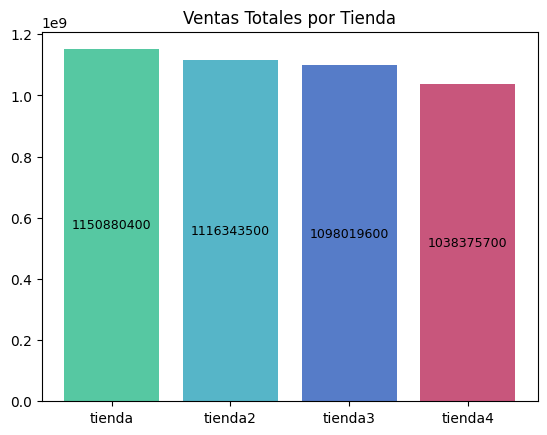

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
bars = ax.bar(ventas_totales_tienda.keys(), ventas_totales_tienda.values(),
              color=[(86/255, 200/255, 162/255), (86/255, 181/255, 200/255),
                     (86/255, 124/255, 200/255), (200/255, 86/255, 124/255)])
ax.set_title('Ventas Totales por Tienda')

labels = [f'{int(h)}' for h in ventas_totales_tienda.values()]
ax.bar_label(bars, labels=labels, label_type='center', fontsize=9)

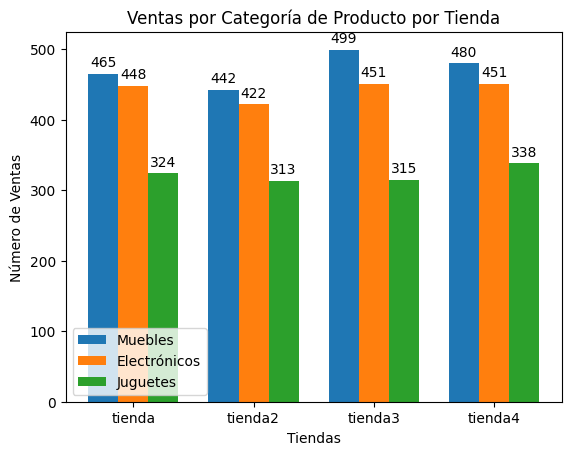

In [14]:
##Ventas por categoría de producto

import numpy as np

categorias = list(next(iter(mejor_categoria_producto.values())).keys())
valores_categoria = {categoria: [] for categoria in categorias}
for tienda in nombres_tiendas:
    for categoria in categorias:
        valor = mejor_categoria_producto[tienda].get(categoria, 0)
        valores_categoria[categoria].append(valor)

x = np.arange(len(nombres_tiendas))
width = 0.25
fig, ax = plt.subplots()
for i, (categoria, valores) in enumerate(valores_categoria.items()):
    ax.bar(x + i*width, valores, width, label=categoria)
    ax.bar_label(ax.containers[i], padding=3)

ax.set_xlabel('Tiendas')
ax.set_ylabel('Número de Ventas')
ax.set_title('Ventas por Categoría de Producto por Tienda')
ax.set_xticks(x + width * (len(categorias) - 1) / 2)
ax.set_xticklabels(nombres_tiendas)
ax.legend()


plt.show()

Text(0.5, 1.0, 'Calificación Promedio por Tienda')

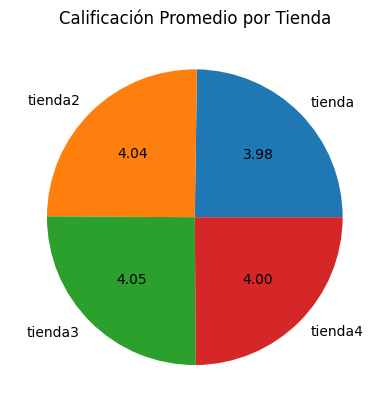

In [15]:
## Calificación promedio por tienda

labels = list(calificacion_promedio_tienda.keys())
values = list(calificacion_promedio_tienda.values())
fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct=lambda value: f'{value/100*sum(values):.2f}')
ax.set_title('Calificación Promedio por Tienda')


Text(0.5, 1.0, 'Productos más y menos vendidos por tienda (3 más / 3 menos)')

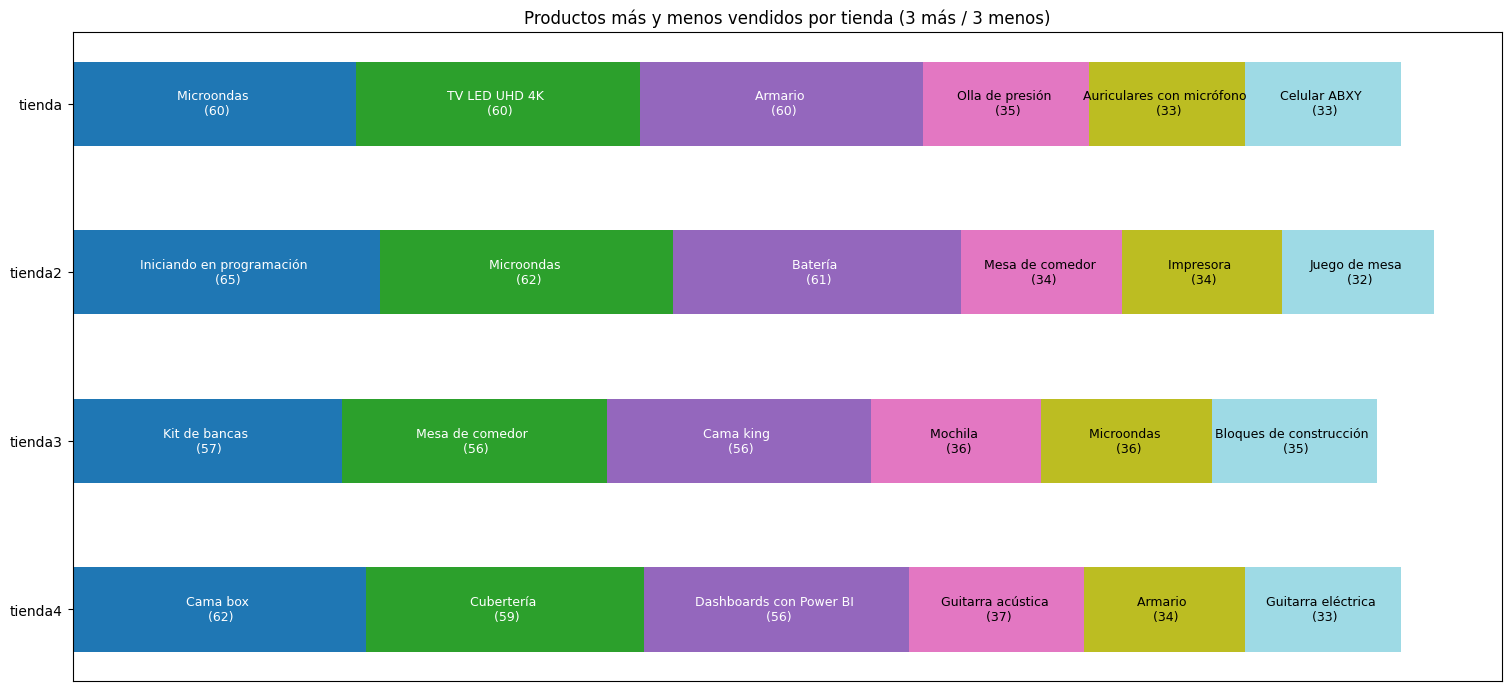

In [16]:
#Productos más y menos vendidos por tienda
import pandas as pd

stores = list(ventas_productos_tienda.keys())
n = len(stores)

# Construir matriz de datos: cada fila = [mas1, mas2, mas3, menos1, menos2, menos3]
data = []
product_labels = []  # mismo shape, guarda nombre de producto por segmento
for store in stores:
    mas = list(ventas_productos_tienda[store]['mas_vendidos'].items())
    menos = list(ventas_productos_tienda[store]['menos_vendidos'].items())
    # asegurar 3 elementos (si faltan, rellenar con 0 y nombre vacío)
    while len(mas) < 3:
        mas.append(("", 0))
    while len(menos) < 3:
        menos.append(("", 0))

    row_vals = [v for (_, v) in mas] + [v for (_, v) in menos]
    row_names = [n for (n, _) in mas] + [n for (n, _) in menos]
    data.append(row_vals)
    product_labels.append(row_names)

data = np.array(data) 

# colores para segmentos
category_colors = plt.get_cmap('tab20')(np.linspace(0, 1, data.shape[1]))

fig, ax = plt.subplots(figsize=(15, 1.2 * n + 2), constrained_layout=True)
labels = stores
data_cum = data.cumsum(axis=1)

for i in range(data.shape[1]):
    widths = data[:, i]
    starts = data_cum[:, i] - widths
    rects = ax.barh(labels, widths, left=starts, height=0.5, color=category_colors[i])

    for j, rect in enumerate(rects):
        w = rect.get_width()
        if w > 0:
            
            txt = f"{product_labels[j][i]} \n ({int(w)})" if product_labels[j][i] else f"({int(w)})"
            # escoger color de texto según contraste
            r, g, b, _ = category_colors[i]
            text_color = 'white' if (r*0.299 + g*0.587 + b*0.114) < 0.6 else 'black'
            ax.text(rect.get_x() + w/2, rect.get_y() + rect.get_height()/2, txt,
                    ha='center', va='center', fontsize=9, color=text_color, wrap=True)

# formato
ax.invert_yaxis()
ax.xaxis.set_visible(False)
ax.set_title("Productos más y menos vendidos por tienda (3 más / 3 menos)")



[Text(0, 0, '26018.61'),
 Text(0, 0, '25216.24'),
 Text(0, 0, '24805.68'),
 Text(0, 0, '23459.46')]

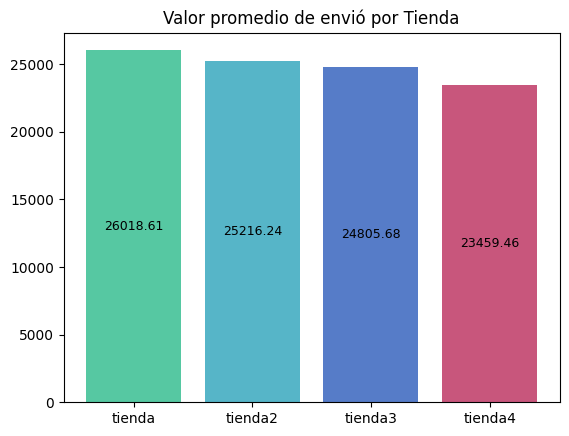

In [17]:
#Valor envio promedio por tienda
fig, ax = plt.subplots()
bars = ax.bar(envio_promedio_tiendas.keys(), envio_promedio_tiendas.values(),
              color=[(86/255, 200/255, 162/255), (86/255, 181/255, 200/255),
                     (86/255, 124/255, 200/255), (200/255, 86/255, 124/255)])
ax.set_title('Valor promedio de envió por Tienda')

labels = [f'{h:.2f}' for h in envio_promedio_tiendas.values()]
ax.bar_label(bars, labels=labels, label_type='center', fontsize=9)



# 7. Conclusión